In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
#read data
data=pd.read_excel("/content/sample_data/pressure_weight.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


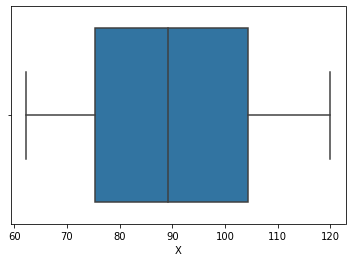

In [5]:
sns.boxplot(x=data['X'])

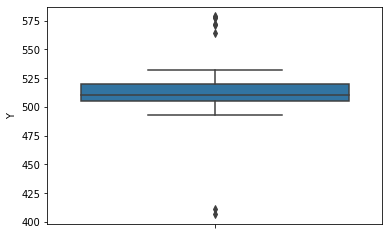

In [6]:
sns.boxplot(y=data['Y'])

In [7]:
f_data = data[(z < 3).all(axis=1)]
f_data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [8]:
print(len(data))
print(len(f_data))
if(len(data) == len(f_data)):
    print('No outliners')

30
30
No outliners


In [9]:
#normalization
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [10]:
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

27


,X,Y
3,0.906574,1.000000
26,0.242215,0.620710
14,0.202422,0.565445
21,0.474048,0.617219
12,0.643599,0.579988


In [12]:
xar = np.array(train_data['X'])
yar = np.array(train_data['Y'])

In [15]:
from sympy import *
m, c = symbols('m c')
exp = '0.5*(y-m*x-c)**2'
exp_diff = Derivative(exp,m)
dfm = exp_diff.doit()
exp_diff = Derivative(exp,c)
dfc = exp_diff.doit()
print(f'1st order derivative w.r.t m and c :\nde/dm = {dfm} \nde/dc = {dfc}')
err=[]

#step 1:
m1=-1.0
c1=1.0
learning_rate=0.1
itr=100

for i in range(0,itr):
  dedm1 = 0
  dedc1 = 0
  er=0
  for j in range(0,len(xar)):
    er +=  ((yar[j] - (m1 * xar[j]) - c1))**2
    #step 2:
    m,c,x,y = symbols('m c x y')
    dedm = dfm.subs(m,m1)
    dedm = dedm.subs(c, c1) 
    dedm= dedm.subs(x, xar[j]) 
    dedm = dedm.subs(y, yar[j])
    dedm = round(dedm,2)
    dedc = dfc.subs(c,c1)
    dedc = dedc.subs(m, m1) 
    dedc = dedc.subs(x, xar[j]) 
    dedc = dedc.subs(y, yar[j])
    dedc = round(dedc,2)
    dedm1 += dedm
    dedc1 += dedc

  dedm1 = dedm1/len(xar)
  dedc1 = dedc1/len(xar)
  dedm1 = round(dedm1,2)
  dedc1 = round(dedc1,2)
  #step 3:
  dm = (-0.1)*learning_rate*dedm1
  dc = (-0.1)*learning_rate*dedc1
  #step 4:
  m1 = m1+dm
  m1 = round(m1,2)
  c1 = c1+dc
  c1 = round(c1,2)
  er = (1/(2*len(train_data['X'])))*(er)
  err.append(er)

print(f'min value of m = {m1} \nmin value of c = {c1}')

1st order derivative w.r.t m and c :
de/dm = -1.0*x*(-c - m*x + y) 
de/dc = 1.0*c + 1.0*m*x - 1.0*y
min value of m = -1.00000000000000 
min value of c = 1.00000000000000


In [16]:
train_data_pred =  m1*train_data['X'] + c1

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
mse

0.09794889408554558

In [18]:
test_data_pred = m1 *test_data['X'] + c1
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
mse2

0.29381843810026503

In [19]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()

In [21]:
x =x1 = float(input("enter pressure of liquid nitrogen value :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"weight of liquid nitrogen based on its pressure {x1} is : {y}")

enter pressure of liquid nitrogen value :82.5
weight of liquid nitrogen based on its pressure 82.5 is : 518.226816608997
